In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
data = pd.read_csv('housing2.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18602,-122.10,37.19,18.0,808.0,136.0,420.0,145.0,7.1831,NEAR OCEAN,273300.0
12206,-117.05,33.52,5.0,3471.0,530.0,1541.0,502.0,4.8083,<1H OCEAN,347700.0
4662,-118.30,34.05,42.0,1476.0,610.0,1605.0,545.0,1.7210,<1H OCEAN,214300.0
11835,-120.96,39.12,24.0,2069.0,436.0,909.0,374.0,2.5326,INLAND,139100.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,INLAND,233100.0
...,...,...,...,...,...,...,...,...,...,...
8013,-118.10,33.84,35.0,1790.0,269.0,924.0,263.0,5.2960,<1H OCEAN,226200.0
10116,-117.93,33.94,28.0,3664.0,719.0,1820.0,657.0,4.2250,<1H OCEAN,224700.0
8762,-118.36,33.81,34.0,2211.0,502.0,1113.0,488.0,4.7026,<1H OCEAN,356800.0
6065,-117.83,33.97,11.0,21533.0,3078.0,9671.0,2890.0,7.0329,<1H OCEAN,368300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

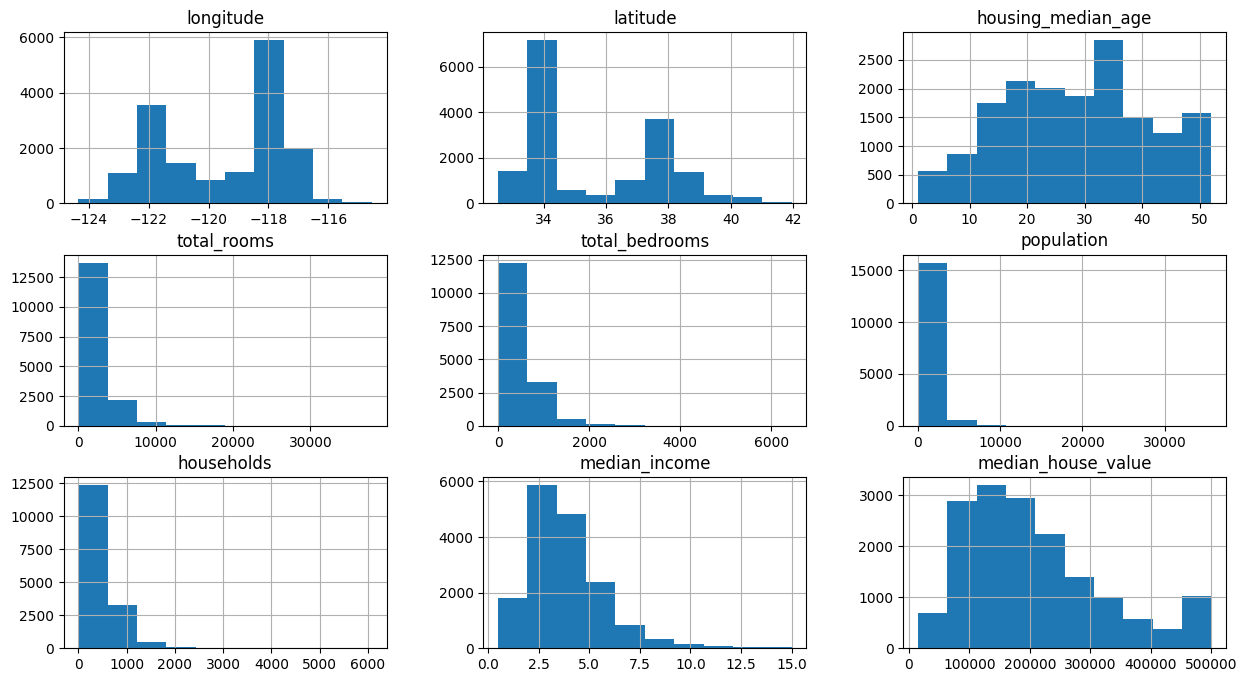

In [11]:
train_data.hist(figsize = (15,8))

In [12]:
train_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

In [13]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924623,-0.106669,0.046403,0.068919,0.100177,0.057449,-0.007837,-0.039086
latitude,-0.924623,1.000000,0.008579,-0.039550,-0.067882,-0.110083,-0.073745,-0.088158,-0.150984
housing_median_age,-0.106669,0.008579,1.000000,-0.362130,-0.322317,-0.296357,-0.304125,-0.115297,0.107852
total_rooms,0.046403,-0.039550,-0.362130,1.000000,0.931309,0.858573,0.919645,0.199212,0.134104
total_bedrooms,0.068919,-0.067882,-0.322317,0.931309,1.000000,0.877765,0.980013,-0.006092,0.049760
population,0.100177,-0.110083,-0.296357,0.858573,0.877765,1.000000,0.906908,0.004522,-0.024750
households,0.057449,-0.073745,-0.304125,0.919645,0.980013,0.906908,1.000000,0.014026,0.064654
median_income,-0.007837,-0.088158,-0.115297,0.199212,-0.006092,0.004522,0.014026,1.000000,0.689227
median_house_value,-0.039086,-0.150984,0.107852,0.134104,0.049760,-0.024750,0.064654,0.689227,1.000000


<Axes: >

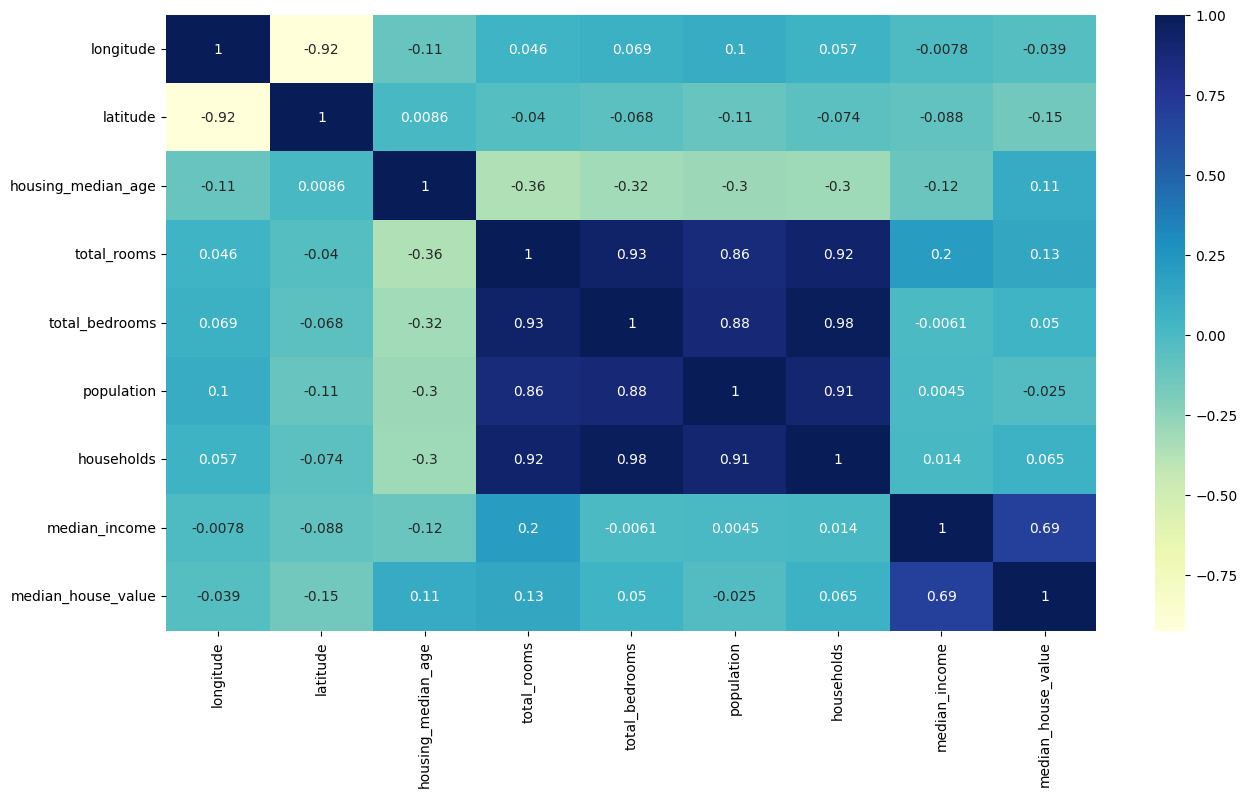

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

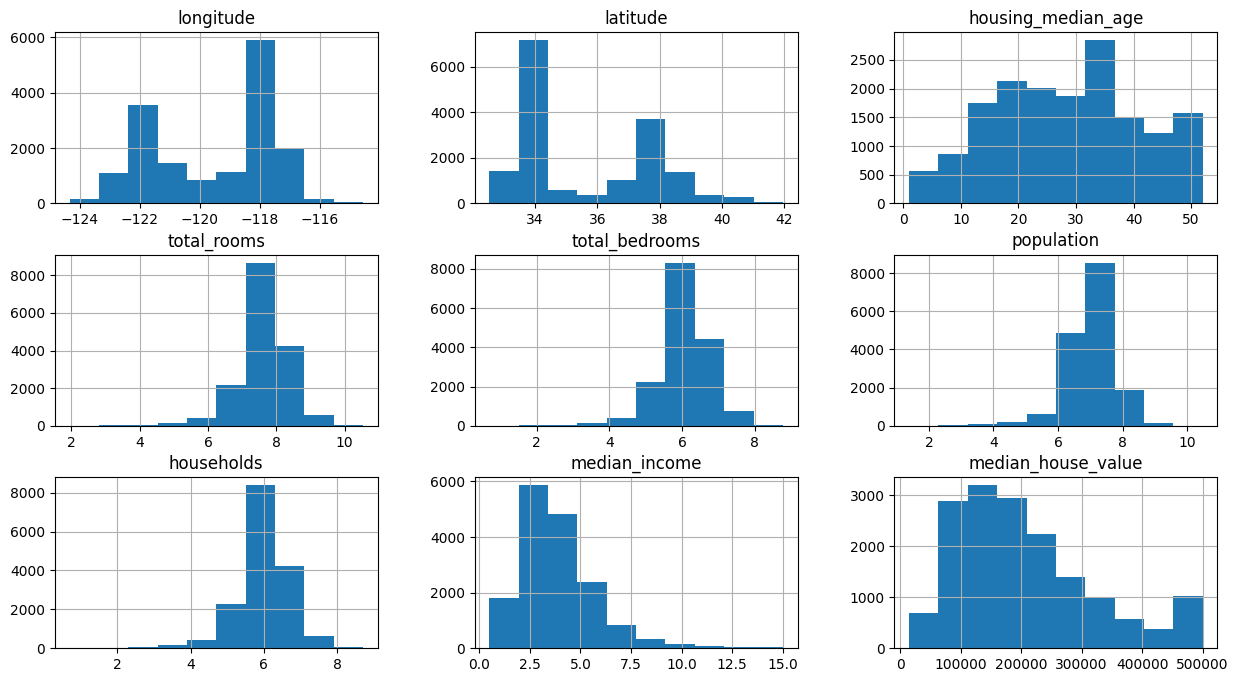

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18602,-122.10,37.19,18.0,6.695799,4.919981,6.042633,4.983607,7.1831,273300.0,False,False,False,False,True
12206,-117.05,33.52,5.0,8.152486,6.274762,7.340836,6.220590,4.8083,347700.0,True,False,False,False,False
4662,-118.30,34.05,42.0,7.297768,6.415097,7.381502,6.302619,1.7210,214300.0,True,False,False,False,False
11835,-120.96,39.12,24.0,7.635304,6.079933,6.813445,5.926926,2.5326,139100.0,False,True,False,False,False
6443,-118.03,34.10,32.0,7.889459,6.413459,7.321850,6.295266,2.9422,233100.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8013,-118.10,33.84,35.0,7.490529,5.598422,6.829794,5.575949,5.2960,226200.0,True,False,False,False,False
10116,-117.93,33.94,28.0,8.206584,6.579251,7.507141,6.489205,4.2250,224700.0,True,False,False,False,False
8762,-118.36,33.81,34.0,7.701652,6.220590,7.015712,6.192362,4.7026,356800.0,True,False,False,False,False
6065,-117.83,33.97,11.0,9.977388,8.032360,9.176990,7.969358,7.0329,368300.0,True,False,False,False,False


<Axes: >

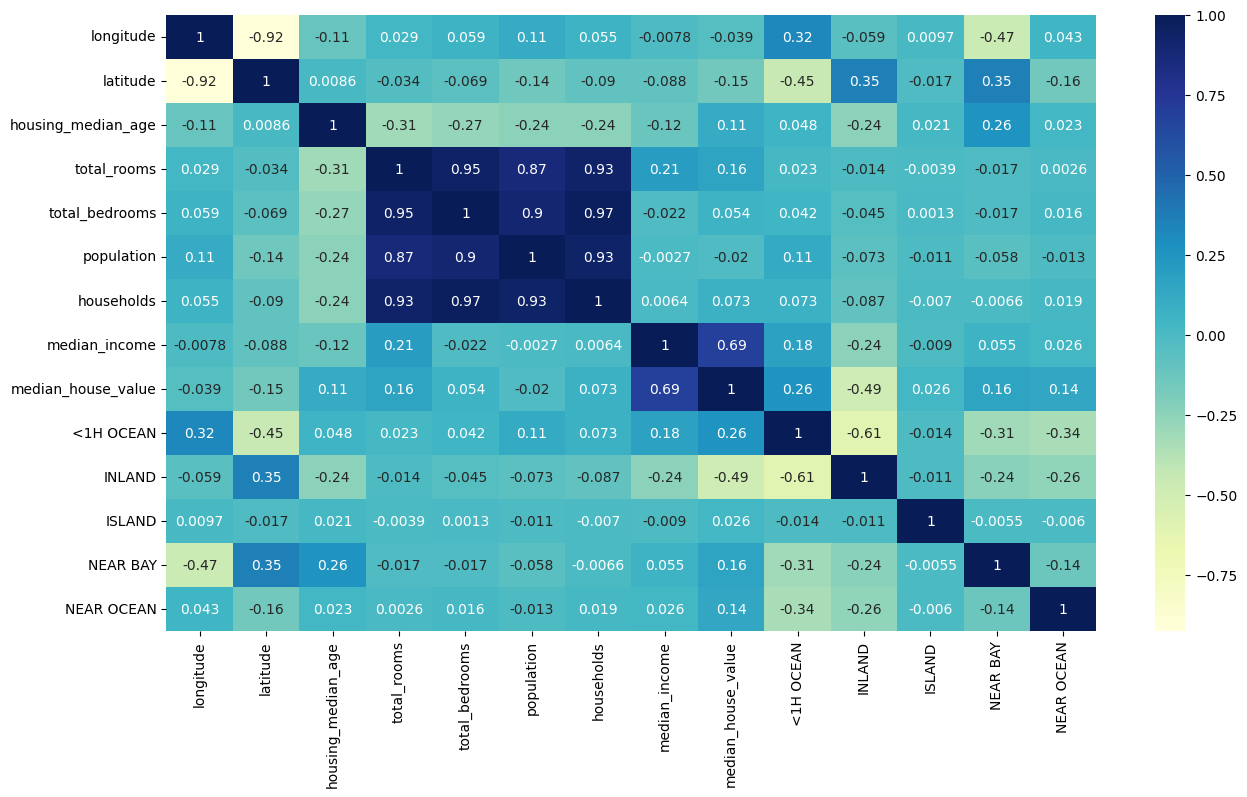

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

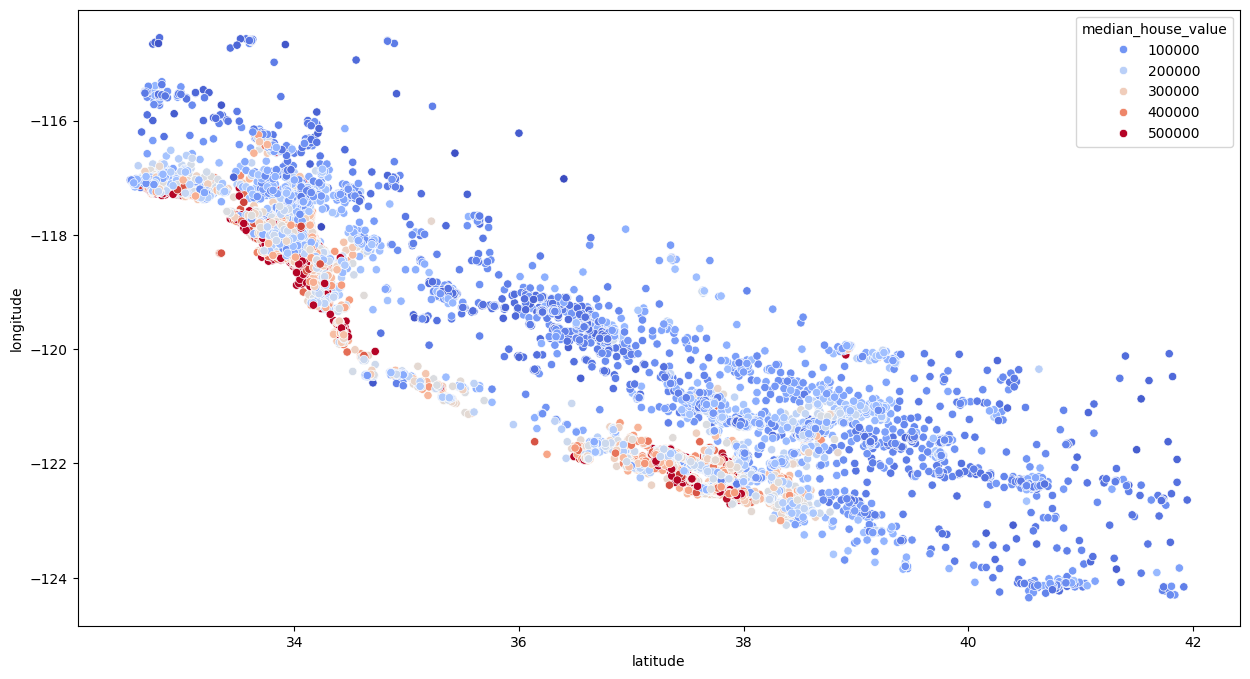

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

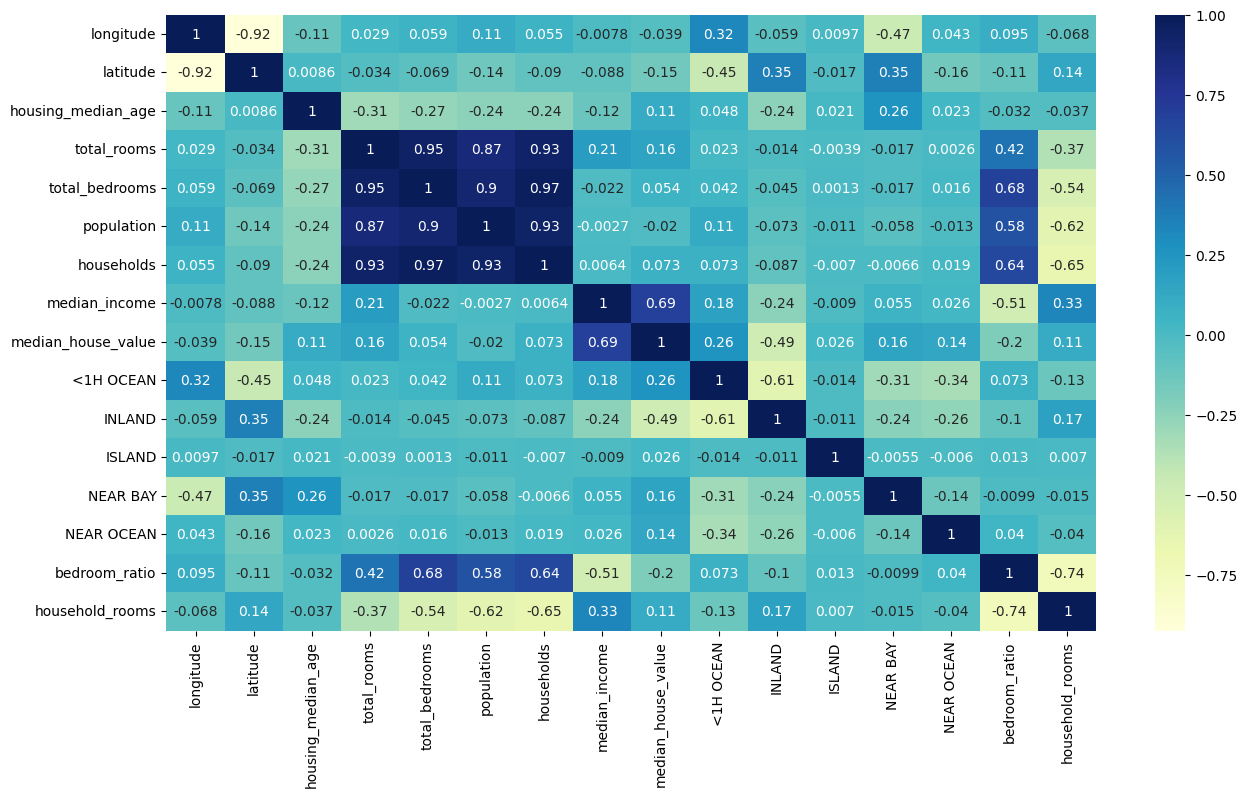

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

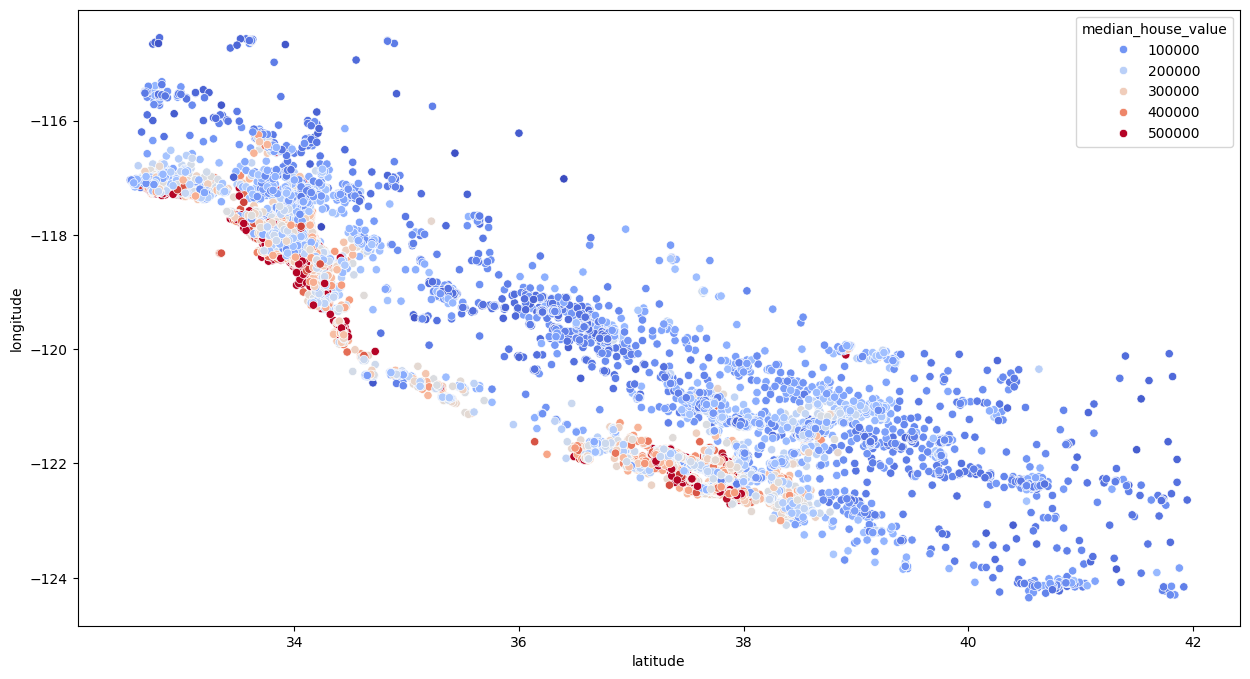

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [57]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18602,-122.10,37.19,18.0,6.695799,4.919981,6.042633,4.983607,7.1831,273300.0,False,False,False,False,True,0.734786,1.343565
12206,-117.05,33.52,5.0,8.152486,6.274762,7.340836,6.220590,4.8083,347700.0,True,False,False,False,False,0.769675,1.310565
4662,-118.30,34.05,42.0,7.297768,6.415097,7.381502,6.302619,1.7210,214300.0,True,False,False,False,False,0.879049,1.157895
11835,-120.96,39.12,24.0,7.635304,6.079933,6.813445,5.926926,2.5326,139100.0,False,True,False,False,False,0.796292,1.288240
6443,-118.03,34.10,32.0,7.889459,6.413459,7.321850,6.295266,2.9422,233100.0,False,True,False,False,False,0.812915,1.253237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8013,-118.10,33.84,35.0,7.490529,5.598422,6.829794,5.575949,5.2960,226200.0,True,False,False,False,False,0.747400,1.343364
10116,-117.93,33.94,28.0,8.206584,6.579251,7.507141,6.489205,4.2250,224700.0,True,False,False,False,False,0.801704,1.264652
8762,-118.36,33.81,34.0,7.701652,6.220590,7.015712,6.192362,4.7026,356800.0,True,False,False,False,False,0.807696,1.243734
6065,-117.83,33.97,11.0,9.977388,8.032360,9.176990,7.969358,7.0329,368300.0,True,False,False,False,False,0.805056,1.251969


In [58]:
train_data.to_csv("f_housing.csv")

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [25]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [26]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [27]:
X_test_s = scaler.transform(X_test)

In [28]:
reg.score(X_test, y_test)

0.6757720623441118

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
forest.score(X_test, y_test)

0.8197367085538849

In [44]:
joblib.dump(forest,"hpp.pkl")

['hpp.pkl']

In [45]:
input_data = pd.DataFrame([[-117.07,32.64,38.0,7.304516,5.598422,6.614726,5.690359,4.6477,False,False,False,False,True,0.766433,1.283665]],
                               columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND','NEAR BAY', 'NEAR OCEAN','bedroom_ratio', 'household_rooms'])


In [46]:
model=joblib.load('hpp.pkl')

In [47]:
model.predict(input_data)[0]      #150400

182278.01

In [48]:
input_data2 = pd.DataFrame([[-122.13,37.40,29.0,8.704171,7.086738,7.896553,7.066467,5.1335,False,False,False,True,False,0.814177,1.231757]],
                               columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND','NEAR BAY', 'NEAR OCEAN','bedroom_ratio', 'household_rooms'])


In [49]:
model.predict(input_data2)[0]     #461200

436848.01

In [60]:
input_data3 = pd.DataFrame([[-121.96,37.25,19.0,7.527794,5.886104,6.673298,5.852202,4.5156,True,False,False,False,False,0.781916,1.286318]],
                               columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND','NEAR BAY', 'NEAR OCEAN','bedroom_ratio', 'household_rooms'])


In [62]:
model.predict(input_data3)[0]     #339300.0

287169.01